In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor

ModuleNotFoundError: No module named 'torchvision'

In [2]:
train_data = datasets.MNIST(
    root= 'data',
    train= True,
    transform=ToTensor(),
    download= True
)
test_data = datasets.MNIST(
    root= 'data',
    train= False,
    transform=ToTensor(),
    download= True
)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [6]:
train_data.targets.size()

torch.Size([60000])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
from torch.utils.data import DataLoader
loaders={
    'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
    
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2a9e1ad0e50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2a9dffe2110>}

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.conv1=nn.Conv2d(1,10,kernel_size=5)
        self.conv2=nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop=nn.Dropout2d()
        self.fc1=nn.Linear(320,50)
        self.fc2=nn.Linear(50,10)

    def forward(self,x):
        x=F.relu(F.max_pool2d(self.conv1(x),2))
        x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x= x.view(-1,320)
        x=F.relu(self.fc1(x))
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)

        return F.softmax(x)

In [12]:
import torch

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()
def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(loaders['train']):
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20==0:
            print(f"Nitin's DigitsInk Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100.*batch_idx/len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
    model.eval()
    test_loss=0
    correct=0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device),target.to(device)
            output = model(data)
            test_loss+=loss_fn(output,target).item()
            pred=output.argmax(dim=1,keepdim=True)
            correct+= pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f"\nNitin's DigitsInk Test set : Average Loss: {test_loss:.4f}, Accuracy {correct} / {len(loaders['test'].dataset)} ({100. *correct/ len(loaders['test'].dataset):.0f}%\n)")

In [13]:
for epoch in range(1,11):
    train(epoch)
    test()

C:\Users\Nitin prajwal R\AppData\Local\Temp\ipykernel_3332\4048452739.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Nitin's DigitsInk Train Epoch: 1 [0/60000 (0%)]	2.302614
Nitin's DigitsInk Train Epoch: 1 [2000/60000 (3%)]	2.289453
Nitin's DigitsInk Train Epoch: 1 [4000/60000 (7%)]	2.184783
Nitin's DigitsInk Train Epoch: 1 [6000/60000 (10%)]	2.066010
Nitin's DigitsInk Train Epoch: 1 [8000/60000 (13%)]	1.967364
Nitin's DigitsInk Train Epoch: 1 [10000/60000 (17%)]	1.961143
Nitin's DigitsInk Train Epoch: 1 [12000/60000 (20%)]	1.888791
Nitin's DigitsInk Train Epoch: 1 [14000/60000 (23%)]	1.833486
Nitin's DigitsInk Train Epoch: 1 [16000/60000 (27%)]	1.765678
Nitin's DigitsInk Train Epoch: 1 [18000/60000 (30%)]	1.804860
Nitin's DigitsInk Train Epoch: 1 [20000/60000 (33%)]	1.808532
Nitin's DigitsInk Train Epoch: 1 [22000/60000 (37%)]	1.745600
Nitin's DigitsInk Train Epoch: 1 [24000/60000 (40%)]	1.717026
Nitin's DigitsInk Train Epoch: 1 [26000/60000 (43%)]	1.666589
Nitin's DigitsInk Train Epoch: 1 [28000/60000 (47%)]	1.693915
Nitin's DigitsInk Train Epoch: 1 [30000/60000 (50%)]	1.665524
Nitin's DigitsInk T

In [15]:
device

device(type='cpu')

C:\Users\Nitin prajwal R\AppData\Local\Temp\ipykernel_3332\4048452739.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Nitin's DigitsInk Prediction: 1


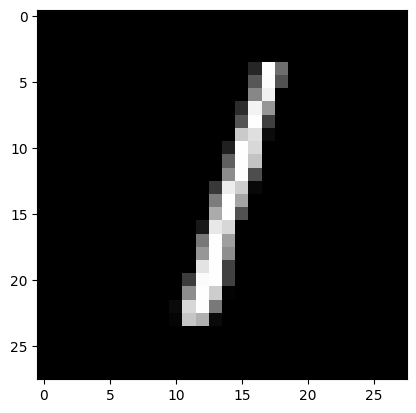

In [24]:
import matplotlib.pyplot as plt
model.eval()
data,target = test_data[2]
data=data.unsqueeze(0).to(device)
output=model(data)
prediction=output.argmax(dim=1, keepdim=True).item()
print(f"Nitin's DigitsInk Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap='gray')
plt.show()